# Stellar Mass Function
---------------------------------------

We infer the stellar mass function for the orbital/infall/interloper classes.

In [1]:
from file_loc import FileLocs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at

# Reading Initial Data

In [3]:
fl = FileLocs()
galaxy_file = fl.gal_fname1
# galaxy_file = '../data/groupCatalog_Yang_deCarvalho2017_galaxy_volumeLimited_v1'
cluster_file= fl.cls_fname

In [4]:
print('--------Initial Files-------')
print('Cluster File : %s'%cluster_file)
print('Galaxy File : %s'%galaxy_file)
print()

--------Initial Files-------
Cluster File : ../data/groupCatalog_Yang_deCarvalho2017.csv
Galaxy File : ../data/groupCatalog_Yang_deCarvalho2017_galaxy_v1.csv



In [5]:
# load catalogs
cat = at.read(cluster_file)
gal0= at.read(galaxy_file)

In [6]:
cat

Yang,RA,DEC,z,logM200,R200,N200
int64,float64,float64,float64,float64,float64,int64
2,240.5602,16.1113,0.036,15.29,2.01,525
4,247.1149,40.8317,0.03,14.66,1.24,217
5,247.1633,39.4674,0.03,14.81,1.4,277
6,167.6936,28.5374,0.033,14.6,1.18,167
7,351.1194,14.6251,0.042,14.51,1.1,106
8,239.5372,27.3133,0.09,15.1,1.71,183
9,241.5673,18.1483,0.038,14.48,1.08,143
10,223.2712,16.724,0.045,14.22,0.89,106
11,10.4693,-9.3997,0.056,14.96,1.55,156


In [7]:
gal0

Yang,objid,specobjid,distance,ra,dec,mu,mg,mr,mi,mz,mu_Err,mg_err,mr_err,mi_err,mz_err,photo_z,photo_zErr,z,zErr,fracDeV_i,bpt,mass,mass_p16,mass_p84,sfr,sfr_p16,sfr_p84,ssfr,ssfr_p16,ssfr_p84,mass_fire,mass_fire_p16,mass_fire_p84,age_fire,age_fire_p16,age_fire_p84,score,row,redshift,M200,R200,R,Rn,vlos,vlosn,infall,orbital,interloper,pinfall,porbital,pinterloper
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64
2,1237665530650231112,2841934444107950080,89.6269391362405,241.57843693246,14.9847540670112,20.4757,18.52523,17.54973,17.16701,16.80302,0.0887008,0.009577838,0.006253762,0.006521441,0.01432577,0.110193,0.010211,0.1231728,2.496678e-05,0.9789842,-1,10.69053,10.59839,10.78236,-1.318207,-2.62379,-0.4930567,-12.05,-13.37045,-11.22545,41403010000.0,32091820000.0,53817920000.0,4929381000.0,3280096000.0,6228817000.0,0.9118443,3,0.036,15.29,2.01,3.8500893881817264,1.9154673573043417,25225.62546596756,12.351819028216573,0,0,1,0.0,0.0,1.0
2,1237665530650231189,2841935543619577856,93.0302672496103,241.621146420941,14.9454652864579,19.19824,17.65663,16.8588,16.41705,16.06843,0.05880325,0.008172314,0.005978988,0.006268373,0.01489483,0.077475,0.024489,0.1269354,1.723609e-05,1.0,3,10.99481,10.89298,11.10171,0.6959944,0.2149101,1.181468,-10.34571,-10.85981,-9.835586,19509270000.0,18445930000.0,30142730000.0,3330074000.0,2980226000.0,5729034000.0,0.9118443,4,0.036,15.29,2.01,3.996285582987262,1.9882017825807274,26314.42768842973,12.88495498662984,0,0,1,0.0,0.0,1.0
2,1237665547827347728,2841891013398652928,66.9279962333088,240.988574304508,15.0749487080488,18.10222,16.55984,15.87389,15.51887,15.23896,0.03046442,0.00452454,0.003532456,0.003606966,0.00795144,0.046343,0.014991,0.03524532,1.029862e-05,0.5167674,1,10.31747,10.22748,10.41237,0.07491233,-0.09746825,0.2819673,-10.28968,-10.48632,-10.06143,6406905000.0,4934299000.0,7745638000.0,8277929000.0,6778579000.0,10976760000.0,0.8717796,5,0.036,15.29,2.01,2.875014705996323,1.430355575122549,-218.38549440486503,-0.10693324963996216,1,0,0,0.78,0.14,0.08
2,1237665566081483195,2838400888110868480,90.4464881468585,240.713424596535,14.6111162264233,17.71942,16.36608,15.73907,15.40933,15.13747,0.02493478,0.004048082,0.003419265,0.003449163,0.007783792,0.04369,0.012716,0.03736607,1.491802e-05,0.1406163,2,10.13713,10.05175,10.2355,-0.1388986,-0.4566603,0.1964595,-10.32625,-10.65404,-9.982267,2199423000.0,1791245000.0,4881733000.0,3430031000.0,2580399000.0,6528688000.0,0.9467953,7,0.036,15.29,2.01,3.885294617538927,1.9329823967855362,395.30645086878485,0.19356323784340831,1,0,0,0.87,0.0,0.13
2,1237665566081548691,2841874520724236288,91.5153203175785,240.861818228176,14.614028977464,18.32219,16.69393,15.93943,15.57824,15.30447,0.03610525,0.004809855,0.003709603,0.003675827,0.008213216,0.055527,0.017263,0.03548127,1.437615e-05,0.9202008,-1,10.11277,10.01669,10.20364,-1.265493,-2.603339,-0.6487934,-11.42083,-12.74024,-10.81532,7989685000.0,6855567000.0,8556743000.0,9227518000.0,7678189000.0,9877236000.0,0.9464893,10,0.036,15.29,2.01,3.9312082617835555,1.9558250058624655,-150.10747272040396,-0.07350066860886335,1,0,0,0.89,0.0,0.11
2,1237665566081548780,2841886065596327936,91.5903972370934,240.928683103086,14.6267166803865,19.25206,17.60691,16.83579,16.39132,16.06802,0.06919918,0.007885234,0.005715102,0.005366819,0.01269586,0.076563,0.017525,0.05630241,1.4803e-05,0.2478099,2,10.27325,10.17875,10.37284,-0.4257214,-0.9914829,-0.005090852,-10.74232,-11.34,-10.32256,7473351000.0,5508679000.0,8928664000.0,8527821000.0,6728601000.0,9377452000.0,0.9464893,11,0.036,15.29,2.01,3.934433328419853,1.9574295166267928,5875.009070679324,2.876719506046089,0,0,1,0.0,0.0,1.0
2,1

# Mask Data
---------------------

In [53]:
mask = np.abs(gal0['vlosn'])<2.
mask&= gal0['ssfr']>-20
mask&= gal0['redshift']<0.085

Nsize = np.count_nonzero(mask)

print('Masking Galaxies')
print('New Size: %i'%(Nsize))
print('fraction: %.2f'%(1.*Nsize/len(gal0)))

Masking Galaxies
New Size: 13507
fraction: 0.42


In [54]:
gal = gal0[mask].copy()

## Magnitude Limit
---------------------------------------

Definit the mass limit of the study

In [55]:
mass = 10**np.array(gal['mass'])
z    = np.array(gal['z'])

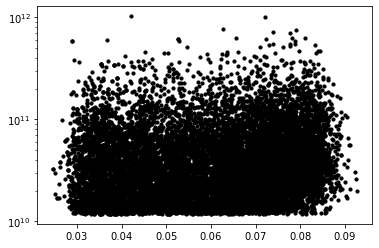

In [56]:
plt.scatter(z,mass,s=10,c='k')
plt.yscale('log')

# Dynamical Classes
---------------------------------------


In [57]:
mass = np.array(gal['mass'])
sfr  = np.array(gal['sfr'])
Pi   = np.array(gal['pinfall'])
Po   = np.array(gal['porbital'])
Pn   = np.array(gal['pinterloper'])

In [58]:
ntotal = int(np.sum(Pi+Po+Pn))

In [59]:
ntotal

13507

In [60]:
wi = np.sum(Pi)/ntotal
print(wi)

0.37731620641149033


In [61]:
wo = np.sum(Po)/ntotal
print(wo)

0.38467313244984086


In [62]:
wn = np.sum(Pn)/ntotal
print(wn)

0.23801066113866884


In [63]:
nsize = int(np.sum(Pi))
idx = np.random.choice(ntotal, nsize, p=Pi/np.sum(Pi), replace=False)
idx.size

5096

(array([122., 389., 536., 624., 754., 761., 719., 643., 404., 144.]),
 array([0.01 , 0.107, 0.204, 0.301, 0.398, 0.495, 0.592, 0.689, 0.786,
        0.883, 0.98 ]),
 <BarContainer object of 10 artists>)

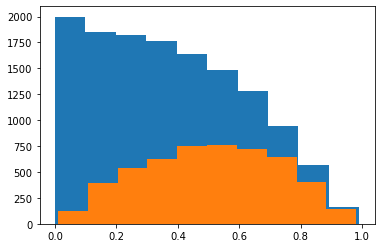

In [64]:
plt.hist(Pi)
plt.hist(Pi[idx])

# Stellar Mass Functions
---------------------------------------

The Press-Schechter function for the mass distribution in this study:

$$ M_\star \frac{dn}{dM} = N \left(\frac{M}{M_{\star}}\right)^\alpha \exp \left(\frac{-M}{M_{\star}}\right) $$

For a lecture on the subject: http://astronomy.nmsu.edu/aklypin/AST616/LumFunction.pdf

* Vmax estimator: https://github.com/manasveesaraf/lumfunc
* Bayesian Method: https://github.com/kasperschmidt/BALFF

In [98]:
def stellar_mass_function(m,norm,alpha,mstar):
    x = 10**m/10**mstar
    res = (norm/10**mstar) * (x**alpha) * np.exp(-x)
    return res

def log_stellar_mass_function(m,norm,alpha,mstar):
    return np.log(stellar_mass_function(m,norm,alpha,mstar))

In [109]:
## weighted poisson stats: https://core.ac.uk/download/pdf/207459783.pdf

def get_mass_function_data(mass,nbins=21,weights=None,eps=1e-6):
    #mbins = np.linspace(10.,np.max(mass),21)
    mbins = np.linspace(10.25,11.75,21)
    ncounts, _ = np.histogram(mass,bins=mbins)
    wcounts, _ = np.histogram(mass,bins=mbins,weights=weights)
    
    ## check w/ Arya my definition of weighted Poisson error
    weff = np.mean(weights**2)
    poisson_err = 1/(np.sqrt(ncounts*weff)+eps)
    mean = 0.5*(mbins[1:]+mbins[:-1])
    return mean,wcounts,poisson_err

In [110]:
smf = dict()

smf['orbital'] = get_mass_function_data(mass,nbins=21,weights=Po)
smf['infall'] = get_mass_function_data(mass,nbins=21,weights=Pi)
smf['interlopers']  = get_mass_function_data(mass,nbins=21,weights=Pn)

In [123]:
import scipy.optimize

x,y,yerr = smf['infall']

p0 = np.array([ 5.08547115e+13, -1.,  1.11960295e+01])
popt, pcov = scipy.optimize.curve_fit(
    log_stellar_mass_function, x, np.log(y), 
    bounds=((p0[0]-100,p0[1]-1.,p0[2]-2),\
            (p0[0]+100,p0[1]+1.,p0[2]+2)))

In [124]:
popt

array([ 5.08547115e+13, -5.88355452e-01,  1.10616048e+01])

Text(0.5, 1.0, 'Stellar Mass Function')

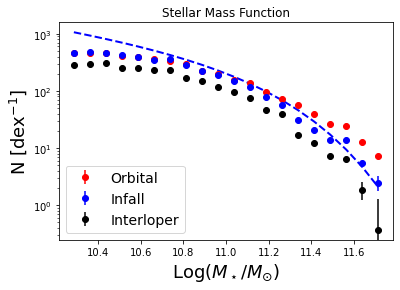

In [125]:
x,y,yerr = smf['orbital']
plt.errorbar(x,y,yerr=yerr,fmt='or',label='Orbital')

x,y,yerr = smf['infall']
plt.errorbar(x,y,yerr=yerr,fmt='ob',label='Infall')

x,y,yerr = smf['interlopers']
plt.errorbar(x,y,yerr=yerr,fmt='ok',label='Interloper')
plt.yscale('log')

plt.legend(fontsize=14)
plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=18)
plt.ylabel(r'N [dex$^{-1}$]',fontsize=18)


# popt = np.array([ 9.85471153e+12, -7.86930576e-01,  1.16259085e+01])
# popt = np.array([ 5.08547115e+13, -0.9,  1.10616048e+01])
plt.plot(x,stellar_mass_function(x,*popt),'b--',lw=2)
plt.title('Stellar Mass Function')

(0.001, 158.4893192461111)

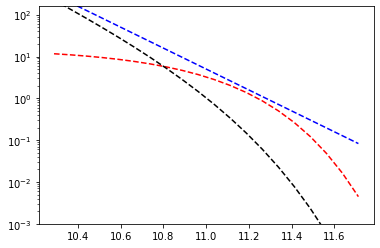

In [126]:
mstar=10.8
alpha=-2.5
norm = 10**12/(10**mstar)

plt.plot(x,norm*(10**x/10**mstar)**alpha,'b--')
plt.plot(x,norm*np.exp(-10**x/10**mstar),'r--')

plt.plot(x,norm*np.exp(-10**x/10**mstar)*(10**x/10**mstar)**alpha,'k--')

plt.yscale('log')
plt.ylim(1e-3,10*norm)

In [27]:
np.min(np.log(y))

-0.020202707316108803

In [28]:
popt

array([ 5.08547115e+13, -2.30595950e-01,  1.11960295e+01])

In [29]:
import scipy.optimize

help(scipy.optimize.curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N). If None, then the
        initi